### Build SVM model for 10,000 images

In [1]:
# import libraries
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
import seaborn as sns
import time


C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\tensorflow\

In [2]:
# function to normalize data
def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

In [3]:
#basedir = '../../../../../../../Desktop/Face_recognition/'
#datasetpath = '../../../../../../../Desktop/Face_recognition/CelebA/Training.txt'
#basedir = '../../../../../../../sonia/Face_recognition/'
#datasetpath = '../../../../../sonia/Face_recognition/CelebA/Training.txt'
#df_training = pd.read_csv(datasetpath, sep=" ", index_col = False, names=('image', 'class'))
#df_training


In [4]:
# read a data from excel file(embedding file)
df_emd = pd.read_excel("CelebA.xlsx", sheet_name = "Sheet1")
df_emd

,Images,Labels,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
0,../../../../../../../Desktop/Face_recognition/...,14,-0.111844,-0.040397,0.008005,-0.009808,0.053051,-0.018495,0.001613,-0.010849,...,-0.022299,-0.026468,0.015961,0.012991,0.065044,-0.042305,0.014783,-0.034854,0.005985,0.065682
1,../../../../../../../Desktop/Face_recognition/...,14,-0.053899,-0.027015,0.073401,-0.019615,0.023837,0.003803,0.010742,-0.056180,...,0.000665,0.012398,-0.008948,-0.000255,0.079757,-0.022045,-0.024136,-0.005053,-0.031327,0.061850
2,../../../../../../../Desktop/Face_recognition/...,14,-0.093583,0.010288,0.011210,0.008576,0.065813,-0.036413,-0.011279,-0.011245,...,0.015279,-0.042507,0.043787,0.029044,0.044691,-0.031127,0.026636,0.015283,-0.022243,0.022617
3,../../../../../../../Desktop/Face_recognition/...,14,-0.030548,-0.018362,0.009033,-0.040010,0.031385,0.008026,0.022224,-0.000514,...,-0.030774,0.008374,-0.029686,-0.002855,0.121509,-0.031774,-0.024131,-0.072375,0.047133,0.035932
4,../../../../../../../Desktop/Face_recognition/...,14,-0.083355,-0.050736,-0.018019,0.013635,0.052849,0.004634,0.016608,-0.043881,...,0.056371,-0.033615,0.012772,0.050218,0.072544,0.020858,-0.011089,-0.073444,-0.004395,0.017994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,../../../../../../../Desktop/Face_recognition/...,1726,0.004924,-0.054827,-0.017430,-0.002137,0.110399,0.019909,-0.008500,-0.085542,...,-0.037298,0.018752,0.024837,0.043310,0.075285,-0.001737,-0.061697,-0.007269,0.055907,-0.105362
9996,../../../../../../../Desktop/Face_recognition/...,1726,0.002935,-0.028735,0.009888,-0.003222,0.050696,0.033102,0.032420,-0.072258,...,0.025078,-0.006978,0.044163,0.102358,0.059551,-0.009940,0.013006,-0.007557,-0.041904,-0.093556
9997,../../../../../../../Desktop/Face_recognition/...,1731,-0.027912,0.048129,0.004471,0.003006,0.016043,-0.018855,0.025526,0.053270,...,-0.004781,-0.045373,-0.044482,-0.075896,-0.000770,0.020550,0.054452,0.019588,0.041638,0.005107
9998,../../../../../../../Desktop/Face_recognition/...,1731,-0.016202,0.053886,0.014018,-0.003342,0.031734,-0.098537,0.004029,0.034217,...,-0.007177,-0.048307,-0.040087,-0.075403,-0.054230,0.028954,0.039627,0.002413,0.056650,0.000439


In [5]:
df_emd["Labels"]

0         14
1         14
2         14
3         14
4         14
        ... 
9995    1726
9996    1726
9997    1731
9998    1731
9999    1731
Name: Labels, Length: 10000, dtype: int64

In [6]:
list(df_emd["Labels"])

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,


In [7]:
# find length of classes
len(set(list(df_emd["Labels"])))

334

In [8]:
# take only train embeddings 
df_train = df_emd.head(7000)
df_train

,Images,Labels,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
0,../../../../../../../Desktop/Face_recognition/...,14,-0.111844,-0.040397,0.008005,-0.009808,0.053051,-0.018495,0.001613,-0.010849,...,-0.022299,-0.026468,0.015961,0.012991,0.065044,-0.042305,0.014783,-0.034854,0.005985,0.065682
1,../../../../../../../Desktop/Face_recognition/...,14,-0.053899,-0.027015,0.073401,-0.019615,0.023837,0.003803,0.010742,-0.056180,...,0.000665,0.012398,-0.008948,-0.000255,0.079757,-0.022045,-0.024136,-0.005053,-0.031327,0.061850
2,../../../../../../../Desktop/Face_recognition/...,14,-0.093583,0.010288,0.011210,0.008576,0.065813,-0.036413,-0.011279,-0.011245,...,0.015279,-0.042507,0.043787,0.029044,0.044691,-0.031127,0.026636,0.015283,-0.022243,0.022617
3,../../../../../../../Desktop/Face_recognition/...,14,-0.030548,-0.018362,0.009033,-0.040010,0.031385,0.008026,0.022224,-0.000514,...,-0.030774,0.008374,-0.029686,-0.002855,0.121509,-0.031774,-0.024131,-0.072375,0.047133,0.035932
4,../../../../../../../Desktop/Face_recognition/...,14,-0.083355,-0.050736,-0.018019,0.013635,0.052849,0.004634,0.016608,-0.043881,...,0.056371,-0.033615,0.012772,0.050218,0.072544,0.020858,-0.011089,-0.073444,-0.004395,0.017994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,../../../../../../../Desktop/Face_recognition/...,1731,-0.014745,0.022017,0.016941,0.025487,-0.006760,-0.027176,0.059529,0.035218,...,0.003477,-0.026958,-0.082625,-0.066671,-0.020683,0.061718,0.044349,0.040125,0.035547,-0.026744
6996,../../../../../../../Desktop/Face_recognition/...,1731,-0.003253,0.079098,0.015410,-0.001021,0.031017,-0.048389,-0.042207,0.060792,...,-0.000819,-0.061776,-0.070643,-0.079764,0.027629,0.006421,-0.001172,0.005584,0.090907,0.047774
6997,../../../../../../../Desktop/Face_recognition/...,1731,0.030423,0.045842,-0.009864,0.015251,0.025280,-0.070754,-0.038140,0.056707,...,-0.004806,-0.041573,-0.043516,-0.107706,-0.033838,0.039708,0.048379,0.032396,0.075916,-0.039056
6998,../../../../../../../Desktop/Face_recognition/...,1731,-0.005930,0.039172,0.019138,-0.014550,0.019051,-0.070911,0.010818,0.045626,...,0.009604,-0.080336,-0.038013,-0.066373,-0.010019,0.035545,0.052552,0.050478,0.060382,0.008987


In [9]:
# Take embeddings for test datset
df_test =df_emd.tail(3000)
df_test

,Images,Labels,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
7000,../../../../../../../Desktop/Face_recognition/...,14,-0.085909,-0.002860,0.046347,-0.000180,0.048312,-0.038898,0.036218,-0.039623,...,-0.012955,0.065656,-0.022992,0.019879,0.032438,0.035387,-0.004797,-0.034639,-0.030574,-0.018152
7001,../../../../../../../Desktop/Face_recognition/...,14,-0.089407,0.025720,-0.005736,-0.011605,0.070474,0.010601,-0.043271,-0.006145,...,0.055619,-0.025066,0.094652,0.000660,0.029296,0.023424,-0.018014,-0.058202,0.025183,-0.011439
7002,../../../../../../../Desktop/Face_recognition/...,14,-0.035921,0.035207,0.069836,-0.017619,0.068801,-0.029043,0.005936,-0.076082,...,-0.014212,-0.027021,0.019310,-0.011342,0.012175,0.048851,0.013080,-0.018034,0.055073,0.004470
7003,../../../../../../../Desktop/Face_recognition/...,14,-0.090283,0.007377,0.029885,0.016015,0.045127,-0.010867,-0.027002,-0.037835,...,0.020522,-0.043777,0.065696,-0.020636,0.023398,-0.015565,0.021063,-0.026025,0.009466,0.037267
7004,../../../../../../../Desktop/Face_recognition/...,14,-0.095194,-0.006736,0.006922,-0.004694,0.073630,0.005073,0.035674,-0.010256,...,0.019507,-0.021528,-0.005447,-0.031595,0.046878,0.061852,0.049048,-0.039904,-0.033685,0.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,../../../../../../../Desktop/Face_recognition/...,1726,0.004924,-0.054827,-0.017430,-0.002137,0.110399,0.019909,-0.008500,-0.085542,...,-0.037298,0.018752,0.024837,0.043310,0.075285,-0.001737,-0.061697,-0.007269,0.055907,-0.105362
9996,../../../../../../../Desktop/Face_recognition/...,1726,0.002935,-0.028735,0.009888,-0.003222,0.050696,0.033102,0.032420,-0.072258,...,0.025078,-0.006978,0.044163,0.102358,0.059551,-0.009940,0.013006,-0.007557,-0.041904,-0.093556
9997,../../../../../../../Desktop/Face_recognition/...,1731,-0.027912,0.048129,0.004471,0.003006,0.016043,-0.018855,0.025526,0.053270,...,-0.004781,-0.045373,-0.044482,-0.075896,-0.000770,0.020550,0.054452,0.019588,0.041638,0.005107
9998,../../../../../../../Desktop/Face_recognition/...,1731,-0.016202,0.053886,0.014018,-0.003342,0.031734,-0.098537,0.004029,0.034217,...,-0.007177,-0.048307,-0.040087,-0.075403,-0.054230,0.028954,0.039627,0.002413,0.056650,0.000439


In [10]:
df_emd

,Images,Labels,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
0,../../../../../../../Desktop/Face_recognition/...,14,-0.111844,-0.040397,0.008005,-0.009808,0.053051,-0.018495,0.001613,-0.010849,...,-0.022299,-0.026468,0.015961,0.012991,0.065044,-0.042305,0.014783,-0.034854,0.005985,0.065682
1,../../../../../../../Desktop/Face_recognition/...,14,-0.053899,-0.027015,0.073401,-0.019615,0.023837,0.003803,0.010742,-0.056180,...,0.000665,0.012398,-0.008948,-0.000255,0.079757,-0.022045,-0.024136,-0.005053,-0.031327,0.061850
2,../../../../../../../Desktop/Face_recognition/...,14,-0.093583,0.010288,0.011210,0.008576,0.065813,-0.036413,-0.011279,-0.011245,...,0.015279,-0.042507,0.043787,0.029044,0.044691,-0.031127,0.026636,0.015283,-0.022243,0.022617
3,../../../../../../../Desktop/Face_recognition/...,14,-0.030548,-0.018362,0.009033,-0.040010,0.031385,0.008026,0.022224,-0.000514,...,-0.030774,0.008374,-0.029686,-0.002855,0.121509,-0.031774,-0.024131,-0.072375,0.047133,0.035932
4,../../../../../../../Desktop/Face_recognition/...,14,-0.083355,-0.050736,-0.018019,0.013635,0.052849,0.004634,0.016608,-0.043881,...,0.056371,-0.033615,0.012772,0.050218,0.072544,0.020858,-0.011089,-0.073444,-0.004395,0.017994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,../../../../../../../Desktop/Face_recognition/...,1726,0.004924,-0.054827,-0.017430,-0.002137,0.110399,0.019909,-0.008500,-0.085542,...,-0.037298,0.018752,0.024837,0.043310,0.075285,-0.001737,-0.061697,-0.007269,0.055907,-0.105362
9996,../../../../../../../Desktop/Face_recognition/...,1726,0.002935,-0.028735,0.009888,-0.003222,0.050696,0.033102,0.032420,-0.072258,...,0.025078,-0.006978,0.044163,0.102358,0.059551,-0.009940,0.013006,-0.007557,-0.041904,-0.093556
9997,../../../../../../../Desktop/Face_recognition/...,1731,-0.027912,0.048129,0.004471,0.003006,0.016043,-0.018855,0.025526,0.053270,...,-0.004781,-0.045373,-0.044482,-0.075896,-0.000770,0.020550,0.054452,0.019588,0.041638,0.005107
9998,../../../../../../../Desktop/Face_recognition/...,1731,-0.016202,0.053886,0.014018,-0.003342,0.031734,-0.098537,0.004029,0.034217,...,-0.007177,-0.048307,-0.040087,-0.075403,-0.054230,0.028954,0.039627,0.002413,0.056650,0.000439


In [11]:
df_emd.drop(df_emd.head(7000).index, inplace = True)

In [12]:
df_emd

,Images,Labels,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,512
7000,../../../../../../../Desktop/Face_recognition/...,14,-0.085909,-0.002860,0.046347,-0.000180,0.048312,-0.038898,0.036218,-0.039623,...,-0.012955,0.065656,-0.022992,0.019879,0.032438,0.035387,-0.004797,-0.034639,-0.030574,-0.018152
7001,../../../../../../../Desktop/Face_recognition/...,14,-0.089407,0.025720,-0.005736,-0.011605,0.070474,0.010601,-0.043271,-0.006145,...,0.055619,-0.025066,0.094652,0.000660,0.029296,0.023424,-0.018014,-0.058202,0.025183,-0.011439
7002,../../../../../../../Desktop/Face_recognition/...,14,-0.035921,0.035207,0.069836,-0.017619,0.068801,-0.029043,0.005936,-0.076082,...,-0.014212,-0.027021,0.019310,-0.011342,0.012175,0.048851,0.013080,-0.018034,0.055073,0.004470
7003,../../../../../../../Desktop/Face_recognition/...,14,-0.090283,0.007377,0.029885,0.016015,0.045127,-0.010867,-0.027002,-0.037835,...,0.020522,-0.043777,0.065696,-0.020636,0.023398,-0.015565,0.021063,-0.026025,0.009466,0.037267
7004,../../../../../../../Desktop/Face_recognition/...,14,-0.095194,-0.006736,0.006922,-0.004694,0.073630,0.005073,0.035674,-0.010256,...,0.019507,-0.021528,-0.005447,-0.031595,0.046878,0.061852,0.049048,-0.039904,-0.033685,0.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,../../../../../../../Desktop/Face_recognition/...,1726,0.004924,-0.054827,-0.017430,-0.002137,0.110399,0.019909,-0.008500,-0.085542,...,-0.037298,0.018752,0.024837,0.043310,0.075285,-0.001737,-0.061697,-0.007269,0.055907,-0.105362
9996,../../../../../../../Desktop/Face_recognition/...,1726,0.002935,-0.028735,0.009888,-0.003222,0.050696,0.033102,0.032420,-0.072258,...,0.025078,-0.006978,0.044163,0.102358,0.059551,-0.009940,0.013006,-0.007557,-0.041904,-0.093556
9997,../../../../../../../Desktop/Face_recognition/...,1731,-0.027912,0.048129,0.004471,0.003006,0.016043,-0.018855,0.025526,0.053270,...,-0.004781,-0.045373,-0.044482,-0.075896,-0.000770,0.020550,0.054452,0.019588,0.041638,0.005107
9998,../../../../../../../Desktop/Face_recognition/...,1731,-0.016202,0.053886,0.014018,-0.003342,0.031734,-0.098537,0.004029,0.034217,...,-0.007177,-0.048307,-0.040087,-0.075403,-0.054230,0.028954,0.039627,0.002413,0.056650,0.000439


In [13]:
#new_df.loc[len(new_df)] = df_emd.iloc[30]

In [14]:

'''for column in feature_names:
    print ("1-------"+ str(column))
    print (df_emd[column].value_counts(dropna=False))'''

'''sentence = 'CelebA/img_align_celeba/115855.jpg'
sentence.rsplit('CelebA/img_align_celeba/', 1)[1]

'''


'''for value in df_training['image']:
    img_train = value.rsplit('CelebA/img_align_celeba/', 1)[1]
    for index, row_emd in df_emd.iterrows():
        img_emd = row_emd['Images'].rsplit('../../../../../../../Desktop/Face_recognition/CelebA/img_align_celeba/', 1)[1]
        
        if(img_train == img_emd):
            print("emd   " + img_emd)
            print("train " + img_train)
            #index_names = new_df[new_df['Images'] == row_emd['Images']].index
            #print(index_names)
            new_df.loc[len(new_df)] = row_emd
            print(len(new_df))'''
            
        


'for value in df_training[\'image\']:\n    img_train = value.rsplit(\'CelebA/img_align_celeba/\', 1)[1]\n    for index, row_emd in df_emd.iterrows():\n        img_emd = row_emd[\'Images\'].rsplit(\'../../../../../../../Desktop/Face_recognition/CelebA/img_align_celeba/\', 1)[1]\n        \n        if(img_train == img_emd):\n            print("emd   " + img_emd)\n            print("train " + img_train)\n            #index_names = new_df[new_df[\'Images\'] == row_emd[\'Images\']].index\n            #print(index_names)\n            new_df.loc[len(new_df)] = row_emd\n            print(len(new_df))'

In [15]:
# copy data into new variable
new_train = df_train.copy()
new_test = df_test.copy()

In [16]:
feature_names_train = new_train.columns.tolist()
features_train = new_train.iloc[:,2:]
#features_train = new_train.drop('Labels', 1)
#features_train = new_train.iloc[:,0]
labels_train = new_train['Labels']

In [17]:

feature_names_test = new_test.columns.tolist()
features_test = new_test.iloc[:,2:]
#features_test = new_test.iloc[:,0]
labels_test = new_test['Labels']

In [18]:
# make data reday to build a model
X_train = features_train
y_train = labels_train
X_test = features_test
y_test = labels_test

In [19]:
#call normalise function 
l2_normalize(X_train)

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
0,-0.030616,-0.011685,0.002199,-0.002799,0.013988,-0.004695,0.000452,-0.002876,0.011338,-0.001880,...,-0.006408,-0.007869,0.004202,0.003341,0.017106,-0.012694,0.004106,-0.007534,0.001512,0.017727
1,-0.014754,-0.007815,0.020159,-0.005597,0.006285,0.000965,0.003013,-0.014894,0.002911,0.009012,...,0.000191,0.003686,-0.002356,-0.000066,0.020975,-0.006615,-0.006704,-0.001092,-0.007914,0.016693
2,-0.025617,0.002976,0.003079,0.002447,0.017353,-0.009244,-0.003163,-0.002981,0.027440,-0.014016,...,0.004390,-0.012638,0.011528,0.007469,0.011753,-0.009340,0.007398,0.003304,-0.005619,0.006104
3,-0.008362,-0.005311,0.002481,-0.011417,0.008275,0.002037,0.006233,-0.000136,-0.015779,0.003052,...,-0.008843,0.002490,-0.007816,-0.000734,0.031955,-0.009534,-0.006702,-0.015644,0.011907,0.009698
4,-0.022817,-0.014676,-0.004949,0.003891,0.013934,0.001176,0.004658,-0.011633,-0.006319,0.024336,...,0.016198,-0.009994,0.003363,0.012914,0.019078,0.006259,-0.003080,-0.015875,-0.001110,0.004857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.004036,0.006369,0.004653,0.007273,-0.001782,-0.006899,0.016696,0.009337,-0.007431,0.017663,...,0.000999,-0.008015,-0.021754,-0.017145,-0.005439,0.018520,0.012318,0.008673,0.008980,-0.007218
6996,-0.000890,0.022880,0.004232,-0.000291,0.008178,-0.012284,-0.011838,0.016116,-0.002256,0.003512,...,-0.000235,-0.018366,-0.018599,-0.020512,0.007266,0.001927,-0.000325,0.001207,0.022965,0.012894
6997,0.008328,0.013260,-0.002709,0.004352,0.006665,-0.017961,-0.010697,0.015033,0.003485,0.015170,...,-0.001381,-0.012360,-0.011457,-0.027698,-0.008899,0.011915,0.013437,0.007003,0.019178,-0.010541
6998,-0.001623,0.011331,0.005256,-0.004152,0.005023,-0.018001,0.003034,0.012096,0.002419,0.012013,...,0.002760,-0.023884,-0.010008,-0.017068,-0.002635,0.010666,0.014596,0.010911,0.015254,0.002425


In [20]:
l2_normalize(X_test)

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
7000,-0.035751,-0.001257,0.019607,-0.000079,0.019555,-0.015410,0.015484,-0.016192,0.001791,0.023970,...,-0.005665,0.029216,-0.009238,0.007829,0.012926,0.015812,-0.002107,-0.011466,-0.011876,-0.007526
7001,-0.037206,0.011308,-0.002426,-0.005081,0.028526,0.004200,-0.018499,-0.002511,0.004011,0.026019,...,0.024323,-0.011154,0.038032,0.000260,0.011674,0.010466,-0.007911,-0.019265,0.009782,-0.004743
7002,-0.014949,0.015479,0.029544,-0.007713,0.027849,-0.011506,0.002538,-0.031090,0.007991,0.028333,...,-0.006215,-0.012024,0.007759,-0.004467,0.004852,0.021828,0.005744,-0.005969,0.021391,0.001853
7003,-0.037571,0.003244,0.012643,0.007011,0.018266,-0.004305,-0.011544,-0.015461,0.023590,0.007929,...,0.008974,-0.019480,0.026397,-0.008128,0.009324,-0.006955,0.009250,-0.008615,0.003677,0.015450
7004,-0.039615,-0.002962,0.002928,-0.002055,0.029803,0.002010,0.015252,-0.004191,0.007457,0.022112,...,0.008530,-0.009580,-0.002189,-0.012444,0.018681,0.027637,0.021539,-0.013208,-0.013084,0.001489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.002049,-0.024105,-0.007373,-0.000936,0.044686,0.007887,-0.003634,-0.034956,0.009780,-0.004329,...,-0.016311,0.008344,0.009980,0.017058,0.030001,-0.000776,-0.027093,-0.002406,0.021715,-0.043681
9996,0.001221,-0.012634,0.004183,-0.001410,0.020520,0.013114,0.013860,-0.029527,0.015170,-0.003122,...,0.010967,-0.003105,0.017745,0.040314,0.023731,-0.004441,0.005711,-0.002501,-0.016276,-0.038787
9997,-0.011616,0.021160,0.001892,0.001316,0.006494,-0.007470,0.010913,0.021768,0.006817,0.015344,...,-0.002091,-0.020190,-0.017873,-0.029892,-0.000307,0.009182,0.023912,0.006484,0.016173,0.002117
9998,-0.006742,0.023691,0.005930,-0.001463,0.012845,-0.039037,0.001723,0.013982,0.017422,0.029487,...,-0.003139,-0.021496,-0.016107,-0.029698,-0.021610,0.012937,0.017402,0.000799,0.022004,0.000182


In [21]:
'''from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(X) 
X = imputer.transform(X)'''

"from sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)\nimputer.fit(X) \nX = imputer.transform(X)"

In [22]:
'''# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test'''

'# Import train_test_split function\nfrom sklearn.model_selection import train_test_split\n# Split dataset into training set and test set\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test'

In [23]:

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma='auto')

start = time.time()

#Train the model using the training sets
clf.fit(X_train, y_train)

end = time.time()

print(f"Runtime of the program is {end - start}")

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Runtime of the program is 72.96011972427368
Accuracy: 0.8916666666666667


In [30]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto')
start = time.time()

#Train the model using the training sets
clf.fit(X_train, y_train)
end = time.time()

print(f"Runtime of the program is {end - start}")

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Runtime of the program is 35.49856615066528
Accuracy: 0.9186666666666666


In [31]:
from sklearn.metrics import classification_report
y_test = y_test[:45]
y_pred = y_pred[:45]
report=classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         14       1.00      0.89      0.94         9
         15       1.00      0.89      0.94         9
         17       1.00      0.89      0.94         9
         21       1.00      1.00      1.00         9
         22       1.00      0.89      0.94         9
       1198       0.00      0.00      0.00         0
       1348       0.00      0.00      0.00         0
       1634       0.00      0.00      0.00         0
       1711       0.00      0.00      0.00         0

avg / total       1.00      0.91      0.95        45



C:\Users\DELLS\Anaconda3\envs\Facenet\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [32]:
results = confusion_matrix(y_test, y_pred)

print('TN - True Negative {}'.format(results[0,0]))
print('FP - False Positive {}'.format(results[0,1]))
print('FN - False Negative {}'.format(results[1,0]))
print('TP - True Positive {}'.format(results[1,1]))
results

TN - True Negative 8
FP - False Positive 0
FN - False Negative 0
TP - True Positive 8


array([[8, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 8, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

<AxesSubplot:>

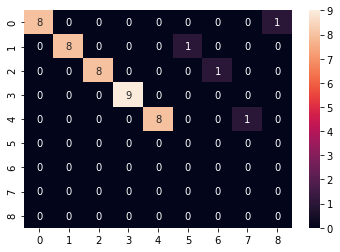

In [33]:
sns.heatmap(results, annot=True)

In [28]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly', gamma='auto')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [29]:
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid', gamma='auto')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8916666666666667
